In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

"""
EDA GOALS:
1. Understand data schema & medical meaning
2. Detect data quality issues
3. Analyze target distribution
4. Discover feature–target relationships
5. Identify transformations needed for ML pipeline
"""

In [6]:
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

pd.set_option("display.max_columns", None)

In [14]:
DATA_PATH = "../data/cardio_train.csv.zip"

df = pd.read_csv(DATA_PATH, sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [15]:
print("Shape:", df.shape)
df.info()


Shape: (70000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [16]:
column_description = {
    "age": "Age in days",
    "gender": "1: women, 2: men",
    "height": "Height in cm",
    "weight": "Weight in kg",
    "ap_hi": "Systolic BP",
    "ap_lo": "Diastolic BP",
    "cholesterol": "1: normal, 2: above normal, 3: well above normal",
    "gluc": "1: normal, 2: above normal, 3: well above normal",
    "smoke": "0: no, 1: yes",
    "alco": "0: no, 1: yes",
    "active": "0: no, 1: yes",
    "cardio": "Target variable"
}

pd.Series(column_description)


age                                                 Age in days
gender                                         1: women, 2: men
height                                             Height in cm
weight                                             Weight in kg
ap_hi                                               Systolic BP
ap_lo                                              Diastolic BP
cholesterol    1: normal, 2: above normal, 3: well above normal
gluc           1: normal, 2: above normal, 3: well above normal
smoke                                             0: no, 1: yes
alco                                              0: no, 1: yes
active                                            0: no, 1: yes
cardio                                          Target variable
dtype: object

In [17]:
df["cardio"].value_counts(normalize=True)


cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64

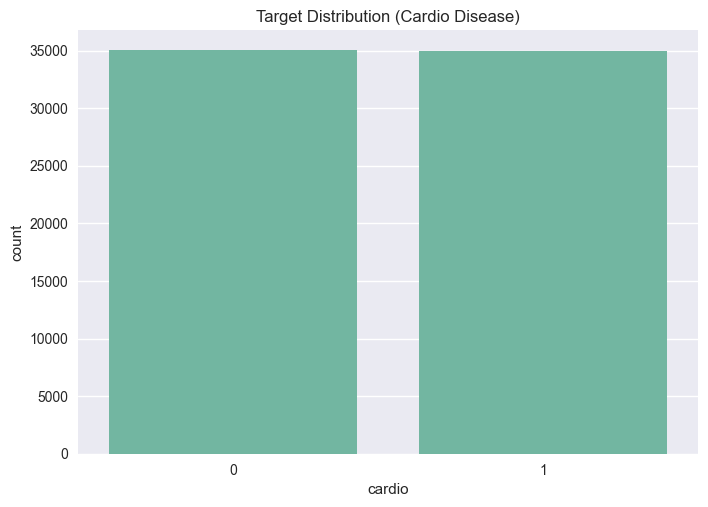

In [18]:
sns.countplot(x="cardio", data=df)
plt.title("Target Distribution (Cardio Disease)")
plt.show()


In [19]:
df["age_years"] = (df["age"] / 365).round(1)
df.drop("age", axis=1, inplace=True)
df.head()


,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.4
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.4
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51.7
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.3
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47.9


In [20]:
num_cols = ["age_years", "height", "weight", "ap_hi", "ap_lo"]

df[num_cols].describe()


,age_years,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339486,164.359229,74.205690,128.817286,96.630414
std,6.759534,8.210126,14.395757,154.011419,188.472530
min,29.600000,55.000000,10.000000,-150.000000,-70.000000
25%,48.400000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000
75%,58.400000,170.000000,82.000000,140.000000,90.000000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000


In [21]:
print("Invalid systolic BP:", (df["ap_hi"] <= 0).sum())
print("Invalid diastolic BP:", (df["ap_lo"] <= 0).sum())
print("ap_hi < ap_lo:", (df["ap_hi"] < df["ap_lo"]).sum())


Invalid systolic BP: 7
Invalid diastolic BP: 22
ap_hi < ap_lo: 1234


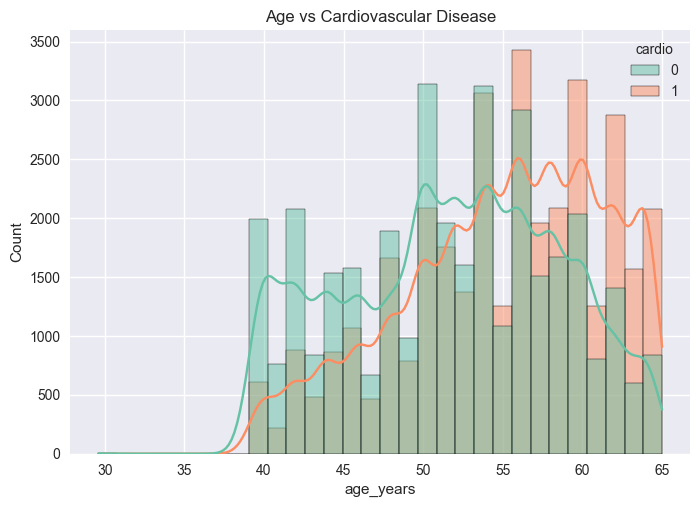

In [22]:
sns.histplot(data=df, x="age_years", hue="cardio", bins=30, kde=True)
plt.title("Age vs Cardiovascular Disease")
plt.show()


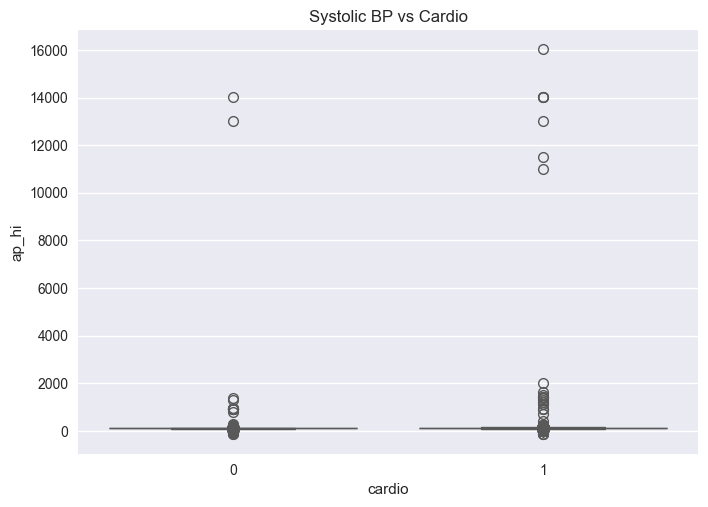

In [23]:
sns.boxplot(x="cardio", y="ap_hi", data=df)
plt.title("Systolic BP vs Cardio")
plt.show()


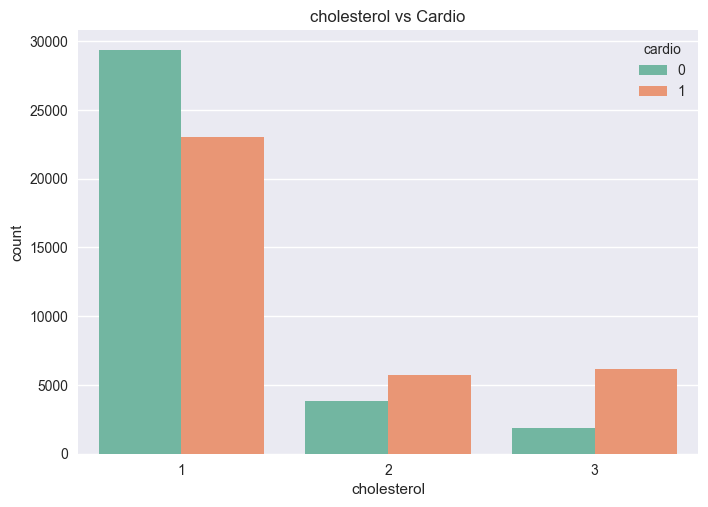

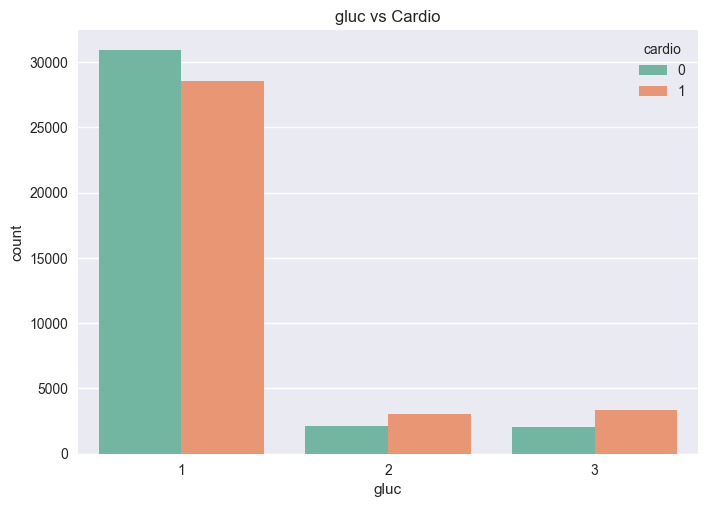

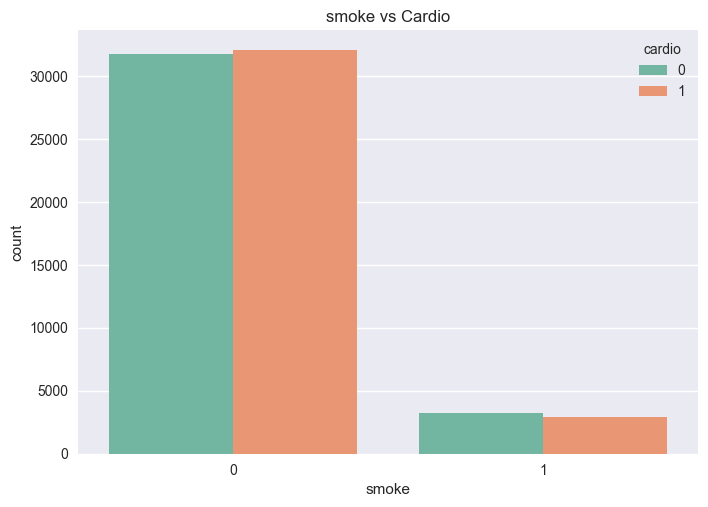

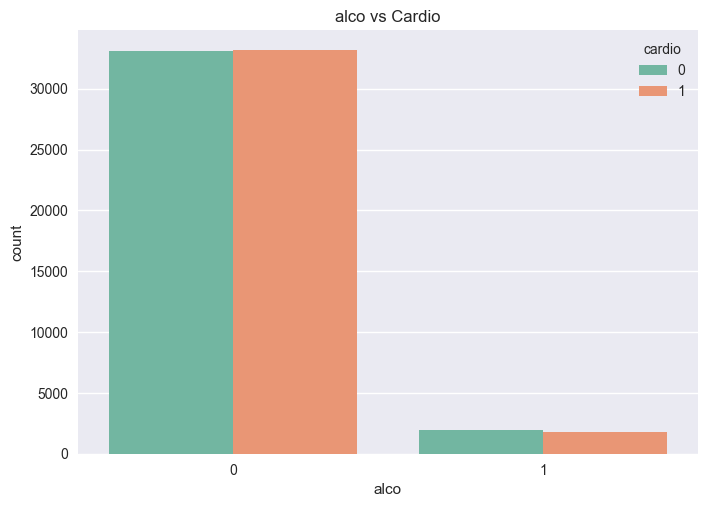

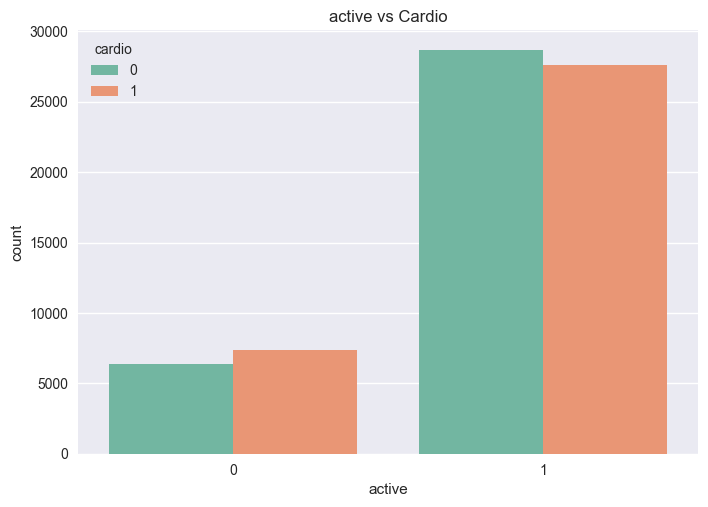

In [24]:
cat_cols = ["cholesterol", "gluc", "smoke", "alco", "active"]

for col in cat_cols:
    sns.countplot(x=col, hue="cardio", data=df)
    plt.title(f"{col} vs Cardio")
    plt.show()


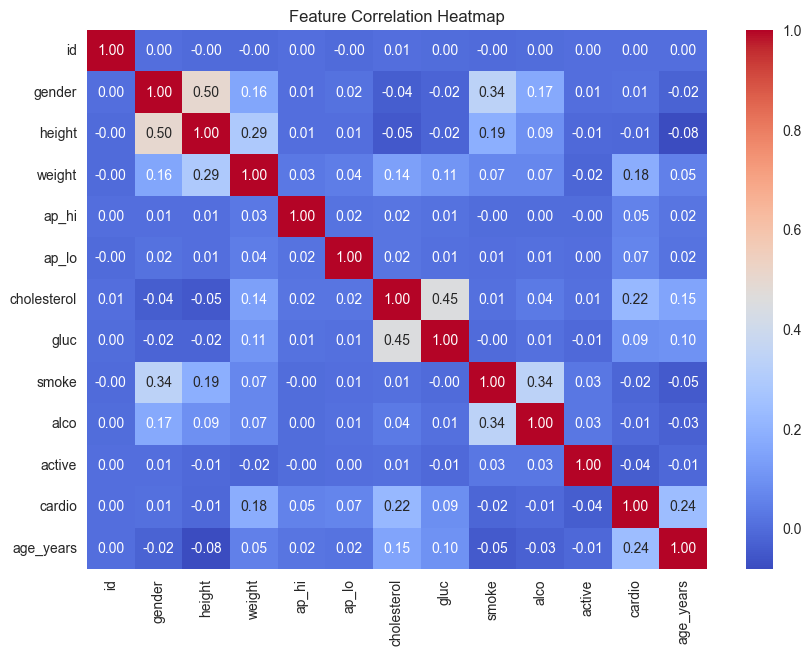

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

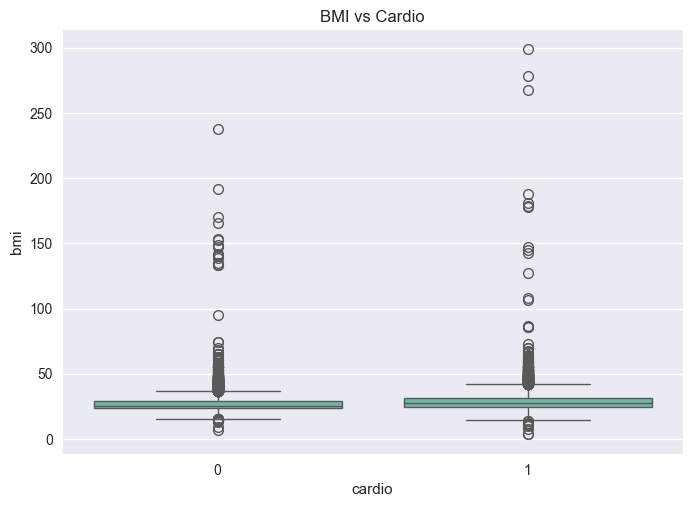

In [29]:
df["bmi"] = df["weight"] / ((df["height"] / 100) ** 2)

sns.boxplot(x="cardio", y="bmi", data=df)
plt.title("BMI vs Cardio")
plt.show()


In [30]:
eda_conclusions = """
1. Dataset is large, clean, and suitable for production ML
2. Age must be converted from days to years
3. Blood pressure contains invalid values → must be filtered
4. BMI is a strong derived feature
5. Cholesterol & activity are strong predictors
6. Target distribution is balanced
7. Tree-based models are well suited
"""
print(eda_conclusions)



1. Dataset is large, clean, and suitable for production ML
2. Age must be converted from days to years
3. Blood pressure contains invalid values → must be filtered
4. BMI is a strong derived feature
5. Cholesterol & activity are strong predictors
6. Target distribution is balanced
7. Tree-based models are well suited

